In [71]:
from sklearn import datasets
from sklearn.model_selection import train_test_split 

In [16]:
import numpy as np

In [10]:
dataset = datasets.load_iris()

In [25]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [31]:
data = dataset['data']
target = dataset['target']
target_names = dataset['target_names']

In [53]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
np.shape(data)

(150, 4)

In [19]:
np.shape(target)

(150,)

In [22]:
import matplotlib.pyplot as plt

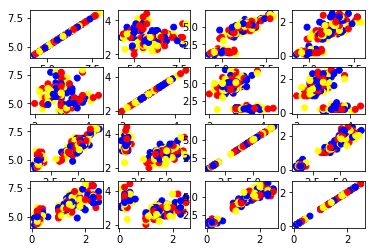

In [54]:
for i in range(4):
    for j in range(4):
            plt.subplot(4,4,i*4+j+1)
            plt.scatter(data[:,i],data[:,j],c=['red','blue','yellow'])
plt.show()

Au vu des graphiques, on a déja un présentiment de corrélation entre les variables: (1,3),(1,4),(3,4) et (3,4)

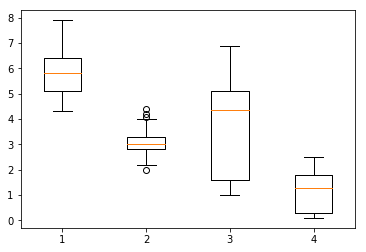

In [56]:
plt.boxplot(data)
plt.show()

Les ordres de grandeur sont quasiment les mêmes. Une normalisaztion n'est pas utile
La variable 2 comporte de nombreuses valeurs potentiellement abérantes.
La variable 3 a une forte dispersion  : elle a un écart-type relativement grand.
Observons les résultats numériquement avec la méthode describe du package Python

In [60]:
import pandas as pd
df = pd.DataFrame(data)

In [61]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [65]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,0,1,2,3
0,1,-0.109369,0.871754,0.817954
1,-0.109369,1,-0.420516,-0.356544
2,0.871754,-0.420516,1,0.962757
3,0.817954,-0.356544,0.962757,1


# 
La valeur 2 est unique et n'a aucune relation avec ses homologues
Par contre les autres variables présentent de fort signe de corrélation
On pourrait donc réduire le problème à deux variables parce que ces variables correlées propagent
les mêmes informations. 


## 2/ Normalisation

    split data

In [84]:
Xa,Xv, Ya, Yv = train_test_split(data,target)

In [85]:
print("Dimension du jeu d'apprentissage :")
print(np.shape(Xa))
print("Dimension du jeu de validation :")
print(np.shape(Xv))


Dimension du jeu d'apprentissage :
(112, 4)
Dimension du jeu de validation :
(38, 4)


In [95]:
df2 = pd.DataFrame(Xa)

In [96]:
df2.describe()

,0,1,2,3
count,112.000000,112.000000,112.000000,112.000000
mean,5.847321,3.036607,3.814286,1.224107
std,0.838162,0.436818,1.747011,0.744015
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.225000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [124]:
normalize = df2.apply(lambda x: (x-x.mean())/x.std())

In [125]:
normalize.describe()

,0,1,2,3
count,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02
mean,5.657677e-16,-4.718448e-16,3.628050e-16,-3.251367e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.846089e+00,-2.373087e+00,-1.553674e+00,-1.510867e+00
25%,-8.916195e-01,-5.416606e-01,-1.267471e+00,-1.107649e+00
50%,-5.645858e-02,-8.380410e-02,3.066463e-01,1.020045e-01
75%,6.593936e-01,4.312845e-01,7.359510e-01,7.740343e-01
max,2.449024e+00,3.121192e+00,1.766282e+00,1.714876e+00


La moyenne est bien quasi nulle et l'écart type autour de 1.
On a bien centrée et reduit notre jeu de données

## Normalisons maintenant notre jeu de données avec sklearn

In [186]:
from sklearn.preprocessing import StandardScaler 

scl = StandardScaler()
normalize_sklearn = scl.fit(Xa)

Xn = normalize_sklearn.transform(Xa)

print("Moyenne :")
print(Xn.mean(axis=0))
print(" Ecart-type: ")
print(Xn.std(axis=0))

Moyenne :
[-1.27180013e-15  8.37954045e-16 -5.28677631e-17 -8.72318091e-17]
 Ecart-type: 
[1. 1. 1. 1.]


### Les valeurs sont bien normalisées au vu des valeurs de moyenne et d'ecart-type obtenu

## 3/ Methode des k plus proches voisin

In [187]:
from sklearn.neighbors import KNeighborsClassifier
resultat_apprentissage = []

# Determinons le nombre optimal de k 

for i in range(3,30):
    voisins = KNeighborsClassifier(n_neighbors=i)
    voisins.fit(Xa,Ya)
    resultat_apprentissage.append(voisins.score(Xa,Ya))

index_max_values = resultat_apprentissage.index(max(resultat_apprentissage))
index_max_values = index_max_values + 3 

# Test pour le max 

voisins = KNeighborsClassifier(n_neighbors=index_max_values)
voisins.fit(Xa,Ya)
print("La valeur du meilleur k est :"+str(index_max_values))
print("Performance sur le jeu de d'apprentissage :"+str(voisins.score(Xa,Ya)))
print("Performance sur le jeu de de test :"+str(voisins.score(Xv,Yv)))


La valeur du meilleur k est :4
Performance sur le jeu de d'apprentissage :0.9642857142857143
Performance sur le jeu de de test :0.9473684210526315


## 4/ Methode des k plus proches voisins avec un jeu de validation intermediaire

In [196]:
Xa,X_test, Ya, Y_test = train_test_split(data,target)
Xa, X_val, Ya, Y_val = train_test_split(Xa,Ya) 

scl = StandardScaler()
normalize_sklearn = scl.fit(Xa)

Xn = normalize_sklearn.transform(Xa)
normalize_sklearn = scl.fit(X_val)
X_valN = scl.transform(X_val)

In [205]:
k_values = [i for i in range(3,30)]
perf_val=[]
perf_app = []

for j in k_values:
    knn = KNeighborsClassifier(j)
    knn.fit(Xn,Ya)
    perf_app.append(knn.score(Xn,Ya))
    perf_val.append(knn.score(X_valN,Y_val))
    
best_k_value_app = k_values[np.argmax(perf_app)]
best_k_value_val = k_values[np.argmax(perf_val)]

In [210]:
print("La valeur du meilleur k sur l'apprentissage :"+str(best_k_value_app))

# On fait l'entrainement a partir du k obtenu
knn = KNeighborsClassifier(best_k_value_app)
knn.fit(Xn,Ya)

# on test ! 
print("Performance sur le jeu de d'apprentissage :"+str(knn.score(X_valN,Y_val)))
print("La valeur du meilleur k sur le jeu de validation :"+str(best_k_value_val))

X_testN = scl.transform(X_test)
print("Performance sur le jeu de test :"+str(knn.score(X_testN,Y_test)))

La valeur du meilleur k sur l'apprentissage :4
Performance sur le jeu de d'apprentissage :0.9642857142857143
La valeur du meilleur k sur le jeu de valid :3
Performance sur le jeu de test :0.9210526315789473


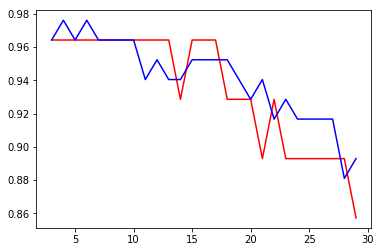

In [216]:
plt.plot(k_values,perf_val,'r')
plt.plot(k_values,perf_app,'b')

## a revoir 

# 5/ Variation des jeux d'apprentissage et d'évaluation

In [214]:
from sklearn.model_selection import KFold

